In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
research = pd.read_csv('user-research.csv') 

In [3]:
research.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,emailofnewyorker+369@gmail.com,M,65.0,"$80,000 - $120,000",Hudson Yards,N,Y,Y,22.0,NaN
1,emailofnewyorker+429@gmail.com,F,25.0,"$120,000 - $200,000",Fort George,Y,Y,N,NaN,I think it is more unsafe than taxis
2,emailofnewyorker+159@gmail.com,F,49.0,"$20,001 - $40,000",Theater District,N,Y,Y,6.0,NaN
3,emailofnewyorker+414@gmail.com,M,72.0,"> $200,000",Tribeca,Y,N,N,NaN,Wouldn't trust the person flying it
4,emailofnewyorker+375@gmail.com,F,42.0,"$80,000 - $120,000",Yorkville,N,N,Y,24.0,NaN


**Questions**

1. What is your email?
2. What gender do you identify as?
3. What is your age?
4. What is your annual income? (income bands)
5. What neighborhood do you reside in?
6. Do you currently use taxis? (Y/N)
7. Do you currently use ridesharing services? (Y/N)
8. Would you use a flying taxi service, if such a concept existed? (Y/N)
9. If yes to Q8, how much would you be willing to pay per mile for such a service? (USD)
10. If no to Q8, what is the reason?

In [5]:
research.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,emailofnewyorker+369@gmail.com,M,65.0,"$80,000 - $120,000",Hudson Yards,N,Y,Y,22.0,NaN
1,emailofnewyorker+429@gmail.com,F,25.0,"$120,000 - $200,000",Fort George,Y,Y,N,NaN,I think it is more unsafe than taxis
2,emailofnewyorker+159@gmail.com,F,49.0,"$20,001 - $40,000",Theater District,N,Y,Y,6.0,NaN
3,emailofnewyorker+414@gmail.com,M,72.0,"> $200,000",Tribeca,Y,N,N,NaN,Wouldn't trust the person flying it
4,emailofnewyorker+375@gmail.com,F,42.0,"$80,000 - $120,000",Yorkville,N,N,Y,24.0,NaN


In [6]:
def labels(title, xaxis, yaxis):
    #'''A function that gives labels to plots'''
    plt.title(title)
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)

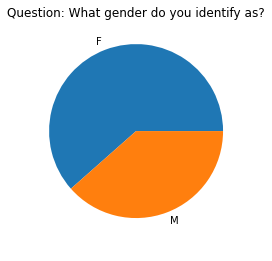

In [7]:
research.Q2.value_counts().plot(kind = 'pie')
labels('Question: What gender do you identify as?',' ', ' ')

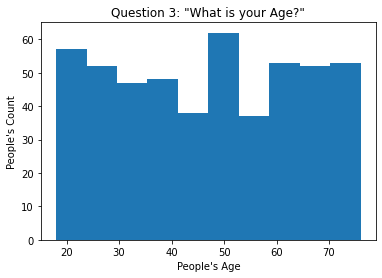

In [10]:
plt.hist(research.Q3)
labels('Question 3: "What is your Age?"', "People's Age", "People's Count")

In [11]:
research.Q4.isnull().sum()

1

In [12]:
research.Q4.value_counts()

$40,001 - $80,000      134
$80,000 - $120,000     118
$120,000 - $200,000     99
$20,001 - $40,000       66
> $200,000              57
$0 - $20,000            25
Name: Q4, dtype: int64

In [13]:
list(research.Q4.unique())

['$80,000 - $120,000',
 '$120,000 - $200,000',
 '$20,001 - $40,000',
 '> $200,000',
 '$0 - $20,000',
 '$40,001 - $80,000',
 nan]

In [14]:
research.loc[pd.isnull(research.Q4)]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
316,emailofnewyorker+500@gmail.com,NaN,NaN,NaN,Tribeca,NaN,NaN,NaN,NaN,It's unsafe


In [15]:
research.Q4.fillna('Null Values', inplace = True)

In [16]:
research.Q4.value_counts()

$40,001 - $80,000      134
$80,000 - $120,000     118
$120,000 - $200,000     99
$20,001 - $40,000       66
> $200,000              57
$0 - $20,000            25
Null Values              1
Name: Q4, dtype: int64

In [17]:
from pandas.api.types import CategoricalDtype
#income_series = pd.Series(['$0 - $20,000', '$20,001 - $40,000', '$40,001 - $80,000', '$80,000 - $120,000', '> $200,000'])
cat_income = CategoricalDtype(
    categories = ['$0 - $20,000','$20,001 - $40,000','$40,001 - $80,000', '$80,000 - $120,000', '> $200,000', 'Null Values'], 
    ordered = True)
research['Q4'] = research.Q4.astype(cat_income)

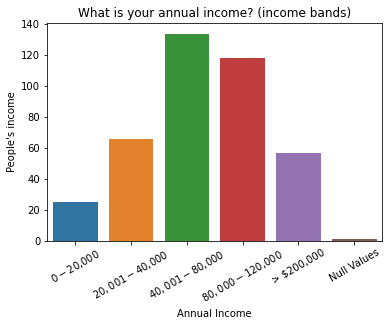

In [18]:
sns.countplot(x = research.Q4)
plt.xticks(rotation=30)
labels("What is your annual income? (income bands)", "Annual Income", "People's income")

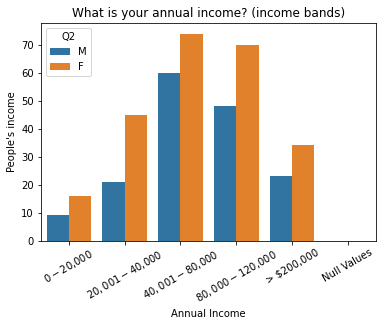

In [19]:
sns.countplot(x = research.Q4, hue = research.Q2)
plt.xticks(rotation=30)
labels("What is your annual income? (income bands)", "Annual Income", "People's income")

In [20]:
research.Q5.isnull().sum()

0

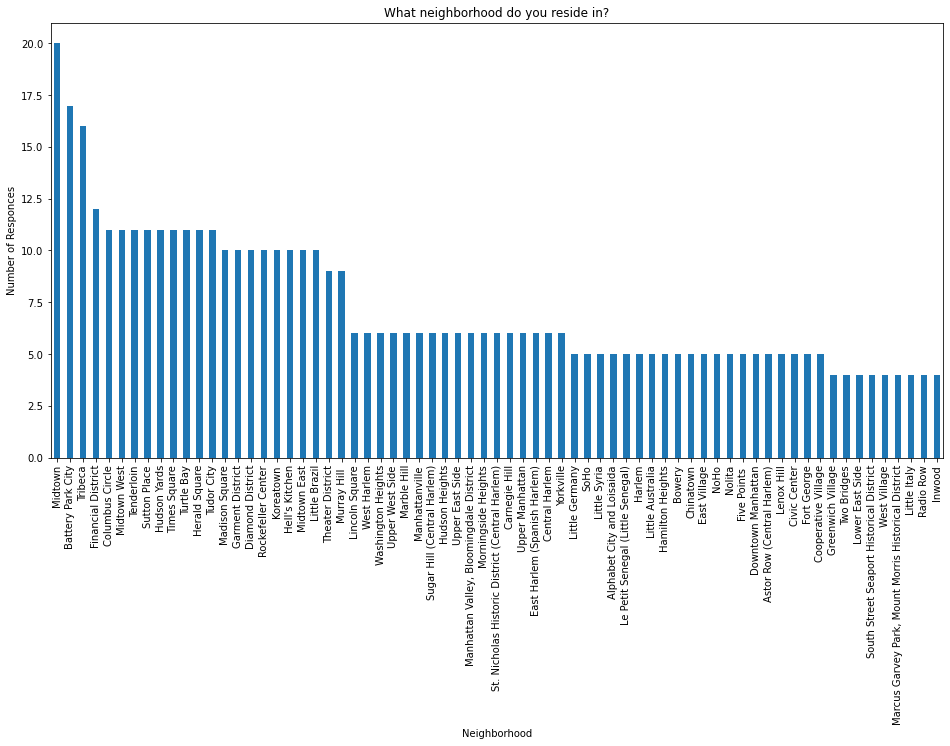

In [21]:
research.Q5.value_counts().plot(kind = 'bar', figsize = [16, 8])
labels('What neighborhood do you reside in?', 'Neighborhood', 'Number of Responces')

In [22]:
research.Q6.value_counts()

Y    406
N     93
Name: Q6, dtype: int64

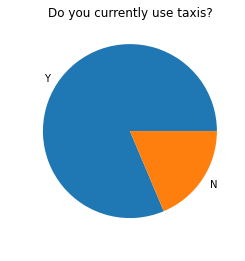

In [23]:
#Do you currently use taxis?
research.Q6.value_counts().plot(kind = 'pie')
labels('Do you currently use taxis?', ' ', ' ')

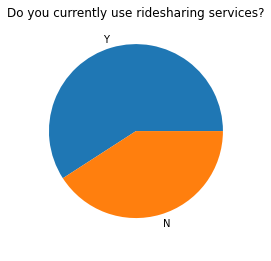

In [24]:
#Do you currently use ridesharing services? (Y/N)
research.Q7.value_counts().plot(kind = 'pie')
labels('Do you currently use ridesharing services?', ' ', ' ')

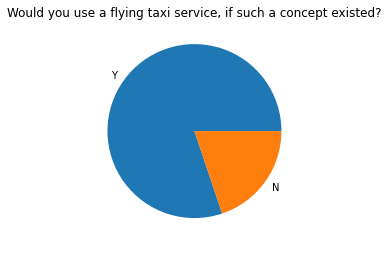

In [25]:
#Would you use a flying taxi service, if such a concept existed? (Y/N)
research.Q8.value_counts().plot(kind = 'pie')
labels('Would you use a flying taxi service, if such a concept existed?', ' ', ' ')

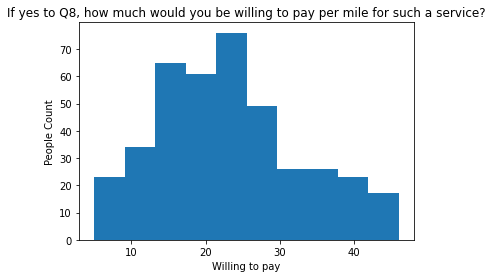

In [31]:
#If yes to Q8, how much would you be willing to pay per mile for such a service? (USD)
plt.hist(research.Q9)
labels('If yes to Q8, how much would you be willing to pay per mile for such a service?', 'Willing to pay', 'People Count');

In [27]:
research.Q9.describe()

count    400.000000
mean      23.180000
std        9.278082
min        5.000000
25%       16.750000
50%       23.000000
75%       29.000000
max       46.000000
Name: Q9, dtype: float64

In [28]:
research.Q9.isnull().sum()

100

In [29]:
research.Q10.isnull().sum()

400

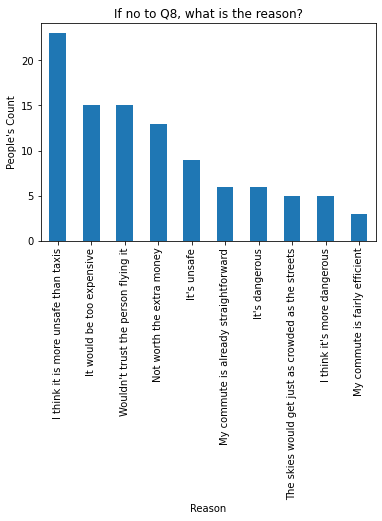

In [30]:
research.Q10.value_counts().plot(kind = 'bar')
labels('If no to Q8, what is the reason?', 'Reason', "People's Count")